In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [3]:
# Encoding categorical data
#print(X)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
#print(X)
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
#print(X)
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
#print(X)
X = X[:, 1:] #get rid of one column to avoid dummy variable trap
#print(X)

/home/reaper/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/reaper/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
# Feature Scaling (compulsory for ANN)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/home/reaper/anaconda3/envs/dl/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/reaper/anaconda3/envs/dl/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/reaper/anaconda3/envs/dl/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/reaper/anaconda3/envs/dl/l

In [7]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 10, init = 'uniform', activation = 'relu', input_dim = 11))
# output_nod number of nodes of the hidden layer - tip: average of the number of nodes in the input layer and the output layer

# Adding the second hidden layer
classifier.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu'))
# now input_dim is not needed

# Adding the third hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

/home/reaper/anaconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=10, kernel_initializer="uniform")`
  """
/home/reaper/anaconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=8, kernel_initializer="uniform")`
  if __name__ == '__main__':
/home/reaper/anaconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  del sys.path[0]
/home/reaper/anaconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  app.launch_new_instance()


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
8000/8000 [==============================] - 9s 1ms/step - loss: 0.4735 - acc: 0.7954
Epoch 2/100
8000/8000 [==============================] - 11s 1ms/step - loss: 0.4268 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 10s 1ms/step - loss: 0.4213 - acc: 0.8085
Epoch 4/100
8000/8000 [==============================] - 9s 1ms/step - loss: 0.4178 - acc: 0.8267
Epoch 5/100
8000/8000 [==============================] - 10s 1ms/step - loss: 0.4156 - acc: 0.8292
Epoch 6/100
8000/8000 [==============================] - 10s 1ms/step - loss: 0.4134 - acc: 0.8305
Epoch 7/100
8000/8000 [==============================] - 10s 1ms/step - loss: 0.4121 - acc: 0.8311
Epoch 8/100
8000/8000 [==============================] - 10s 1ms/step - loss: 0.4121 - acc: 0.8327
Epoch 9/100
8000/8000 [==============================] - 9s 1ms/step - loss: 0.4104 - acc: 0.8330
Epoch 10/100
8000

In [8]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

[[1519   76]
 [ 194  211]]


Text(0.5, 1, 'Confusion Matrix')

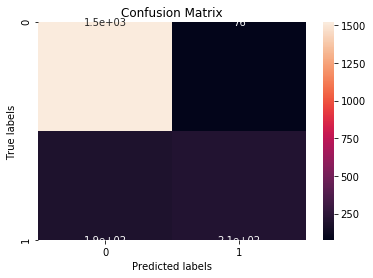

In [10]:
# Making the Confusion Matrix
import seaborn as sn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, range(2), range(2))
ax= plt.subplot()
sn.heatmap(df_cm, annot=True, ax = ax); #annot=True to annotate cells
print(cm)
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')